In [513]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [514]:
train = pd.read_csv("train.csv")

In [515]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [516]:
train.head(7)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True


<AxesSubplot:>

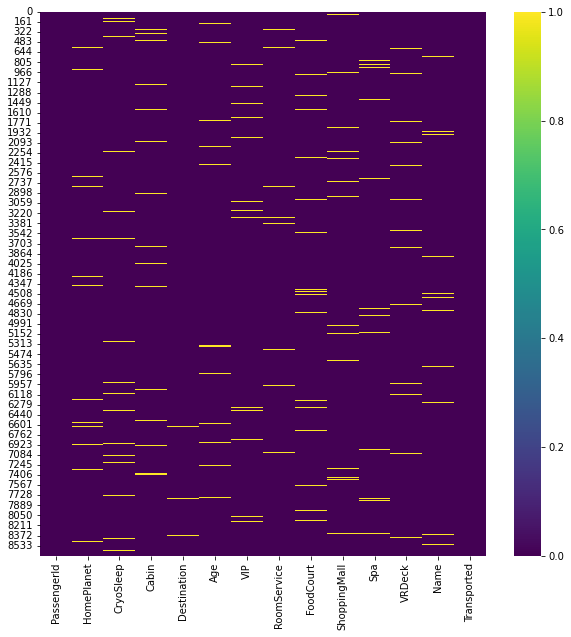

In [517]:
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull(), cmap="viridis")

In [518]:
# Fixing PassengerId
train.drop("PassengerId", axis=1, inplace=True)

# Filling Nan for HomePlanet
train["HomePlanet"].fillna("UnknownHome", inplace=True)

# Filling Nan for CryoSleep
def fillCryo(cryo):
    if pd.isnull(cryo):
        return random.randint(0,1) == 1
    else:
        return cryo
    
train["CryoSleep"] = train["CryoSleep"].apply(fillCryo)

# Fixing Cabin
train.drop("Cabin", axis=1, inplace=True)

# Fixing Destination
train["Destination"].fillna("UnknownDest", inplace=True)

# Fixing Age
train["Age"].fillna(train["Age"].mean(), inplace=True)

# Fixing VIP. If not known then they are not VIP because VIP are known.
train["VIP"].fillna("False", inplace=True)

# Fixing RoomService
train["RoomService"].fillna(train["RoomService"].mean(), inplace=True)

# Fixing FoodCourt
train["FoodCourt"].fillna(train["FoodCourt"].mean(), inplace=True)

# Fixing ShoppingMall
train["ShoppingMall"].fillna(train["ShoppingMall"].mean(), inplace=True)

# Fixing Spa
train["Spa"].fillna(train["Spa"].mean(), inplace=True)

# Fixing VRDeck
train["VRDeck"].fillna(train["VRDeck"].mean(), inplace=True)

# No need of Name
train.drop("Name", axis=1, inplace=True)

<AxesSubplot:>

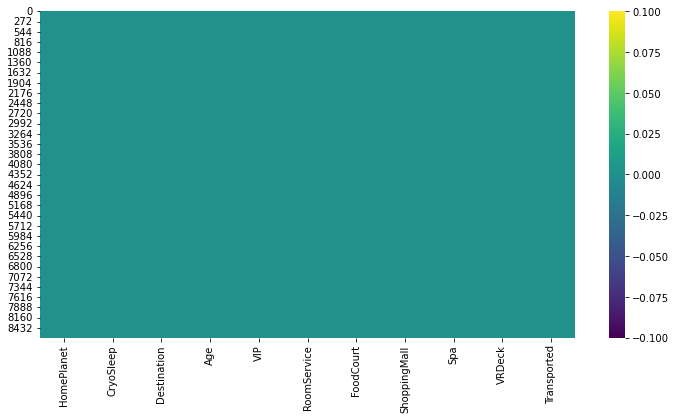

In [519]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), cmap="viridis")

In [520]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [521]:
# Changing True/False to 1/0
def TrueOrFalse(value):
    value = str(value)
    return {"True":1, "False":0}[value]

train["CryoSleep"] = train["CryoSleep"].apply(TrueOrFalse)
train["VIP"] = train["VIP"].apply(TrueOrFalse)
train["Transported"] = train["Transported"].apply(TrueOrFalse)

In [522]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [523]:
train["HomePlanet"].unique()

array(['Europa', 'Earth', 'Mars', 'UnknownHome'], dtype=object)

In [524]:
train["Destination"].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 'UnknownDest'],
      dtype=object)

In [525]:
# Dummy Variables
home = pd.get_dummies(train["HomePlanet"], drop_first=True)
dest = pd.get_dummies(train['Destination'], drop_first=True)

train.drop(["HomePlanet","Destination"], axis=1, inplace=True)

train = pd.concat([train,home,dest], axis=1)

In [526]:
train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Europa,Mars,UnknownHome,PSO J318.5-22,TRAPPIST-1e,UnknownDest
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1,0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1,0


# Logistic Regression

In [527]:
# Splitting Data
from sklearn.model_selection import train_test_split

In [528]:
X = train.drop("Transported", axis=1)
y = train["Transported"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=42)

In [529]:
from sklearn.linear_model import LogisticRegression

In [530]:
logmodel = LogisticRegression(max_iter = 1000)

In [531]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [532]:
log_pred = logmodel.predict(X_test)

In [533]:
from sklearn.metrics import classification_report, confusion_matrix

In [534]:
print(confusion_matrix(y_test, log_pred))
print()
print(classification_report(y_test, log_pred))
print()

[[641 220]
 [167 711]]

              precision    recall  f1-score   support

           0       0.79      0.74      0.77       861
           1       0.76      0.81      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739




# Deep Learning Model

In [535]:
X = train.drop("Transported", axis=1)
y = train["Transported"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=42)

In [536]:
# Scaling Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [537]:
# Training Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [538]:
X_train.shape

(6954, 14)

In [539]:
# Early Stopping & Dropout
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.5))

# Binary Classification
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")

In [540]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          epochs=600,
          callbacks=[early_stop])

Epoch 1/600
218/218 [==============================] - 1s 2ms/step - loss: 0.6845 - val_loss: 0.6518
Epoch 2/600
218/218 [==============================] - 0s 1ms/step - loss: 0.6520 - val_loss: 0.6060
Epoch 3/600
218/218 [==============================] - 0s 1ms/step - loss: 0.6236 - val_loss: 0.5729
Epoch 4/600
218/218 [==============================] - 0s 1ms/step - loss: 0.6140 - val_loss: 0.5530
Epoch 5/600
218/218 [==============================] - 0s 1ms/step - loss: 0.5979 - val_loss: 0.5391
Epoch 6/600
218/218 [==============================] - 0s 1ms/step - loss: 0.5866 - val_loss: 0.5263
Epoch 7/600
218/218 [==============================] - 0s 1ms/step - loss: 0.5729 - val_loss: 0.5097
Epoch 8/600
218/218 [==============================] - 0s 1ms/step - loss: 0.5656 - val_loss: 0.5020
Epoch 9/600
218/218 [==============================] - 0s 1ms/step - loss: 0.5561 - val_loss: 0.4936
Epoch 10/600
218/218 [==============================] - 0s 1ms/step - loss: 0.5489 - val_lo

218/218 [==============================] - 0s 1ms/step - loss: 0.4802 - val_loss: 0.4353
Epoch 82/600
218/218 [==============================] - 0s 1ms/step - loss: 0.4794 - val_loss: 0.4361
Epoch 83/600
218/218 [==============================] - 0s 1ms/step - loss: 0.4765 - val_loss: 0.4396
Epoch 84/600
218/218 [==============================] - 0s 1ms/step - loss: 0.4789 - val_loss: 0.4397
Epoch 85/600
218/218 [==============================] - 0s 1ms/step - loss: 0.4780 - val_loss: 0.4340
Epoch 86/600
218/218 [==============================] - 0s 1ms/step - loss: 0.4785 - val_loss: 0.4380
Epoch 87/600
218/218 [==============================] - 0s 1ms/step - loss: 0.4787 - val_loss: 0.4350
Epoch 88/600
218/218 [==============================] - 0s 1ms/step - loss: 0.4801 - val_loss: 0.4350
Epoch 89/600
218/218 [==============================] - 0s 1ms/step - loss: 0.4789 - val_loss: 0.4347
Epoch 90/600
218/218 [==============================] - 0s 1ms/step - loss: 0.4805 - val_loss: 

<AxesSubplot:>

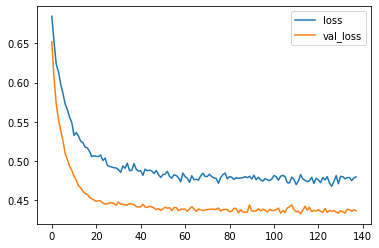

In [541]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [542]:
predictions = (model.predict(X_test) > 0.5)*1

55/55 [==============================] - 0s 755us/step


In [543]:
print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))
print()

[[656 205]
 [163 715]]

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       861
           1       0.78      0.81      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739




### Deep Learning Model is better than Logistic Regression Model

# Test

In [544]:
test = pd.read_csv("test.csv")
test_ids = test["PassengerId"].values

In [545]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


<AxesSubplot:>

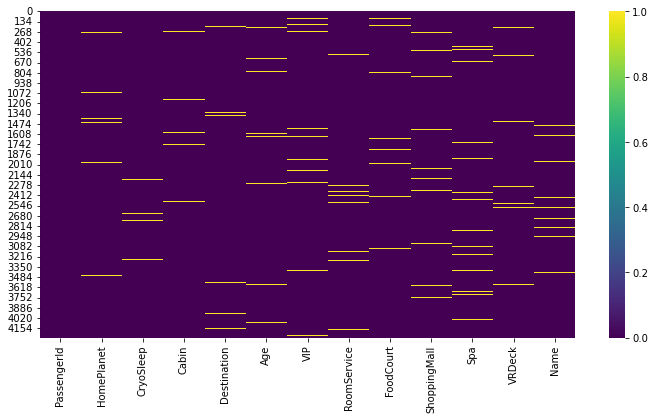

In [546]:
plt.figure(figsize=(12,6))
sns.heatmap(test.isnull(), cmap="viridis")

In [547]:
# Fixing PassengerId
test.drop("PassengerId", axis=1, inplace=True)

# Filling Nan for HomePlanet
test["HomePlanet"].fillna("UnknownHome", inplace=True)

# Filling Nan for CryoSleep
def fillCryo(cryo):
    if pd.isnull(cryo):
        return random.randint(0,1) == 1
    else:
        return cryo
    
test["CryoSleep"] = test["CryoSleep"].apply(fillCryo)

# Fixing Cabin
test.drop("Cabin", axis=1, inplace=True)

# Fixing Destination
test["Destination"].fillna("UnknownDest", inplace=True)

# Fixing Age
test["Age"].fillna(test["Age"].mean(), inplace=True)

# Fixing VIP. If not known then they are not VIP because VIP are known.
test["VIP"].fillna("False", inplace=True)

# Fixing RoomService
test["RoomService"].fillna(test["RoomService"].mean(), inplace=True)

# Fixing FoodCourt
test["FoodCourt"].fillna(test["FoodCourt"].mean(), inplace=True)

# Fixing ShoppingMall
test["ShoppingMall"].fillna(test["ShoppingMall"].mean(), inplace=True)

# Fixing Spa
test["Spa"].fillna(test["Spa"].mean(), inplace=True)

# Fixing VRDeck
test["VRDeck"].fillna(test["VRDeck"].mean(), inplace=True)

# No need of Name
test.drop("Name", axis=1, inplace=True)

<AxesSubplot:>

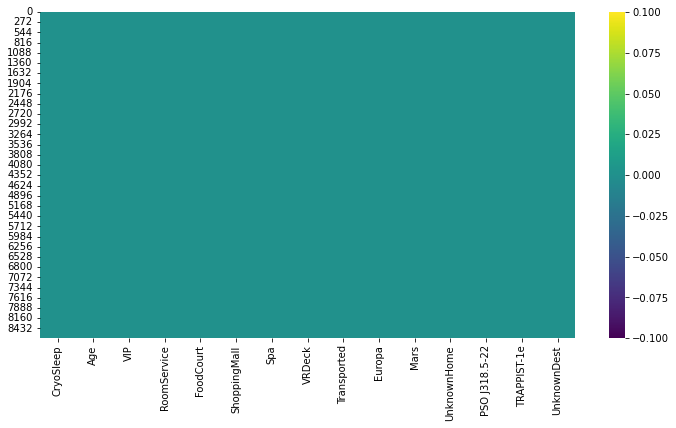

In [548]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), cmap="viridis")

In [549]:
# Changing True/False to 1/0
def TrueOrFalse(value):
    value = str(value)
    return {"True":1, "False":0,
           "1":1,"0":0}[value]

test["CryoSleep"] = test["CryoSleep"].apply(TrueOrFalse)
test["VIP"] = test["VIP"].apply(TrueOrFalse)

In [550]:
# Dummy Variables
home = pd.get_dummies(test["HomePlanet"], drop_first=True)
dest = pd.get_dummies(test['Destination'], drop_first=True)

test.drop(["HomePlanet","Destination"], axis=1, inplace=True)

test = pd.concat([test,home,dest], axis=1)

In [551]:
test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Europa,Mars,UnknownHome,PSO J318.5-22,TRAPPIST-1e,UnknownDest
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,1,0
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,0,0,0,1,0
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,0,0,0,0,1,0


In [552]:
# Scaling Data
scaler = MinMaxScaler()
scaler.fit(train.drop("Transported", axis=1)) # Fitting entire training data
test = scaler.transform(test)

In [553]:
submission_preds = (model.predict(test) > 0.5)*1

134/134 [==============================] - 0s 744us/step


In [554]:
submission_preds.reshape(-1,)

array([1, 0, 1, ..., 1, 1, 1])

In [555]:
final_pred = []
for i in submission_preds:
    final_pred.append(str(i[0]==1))

In [556]:
final_pred

['True',
 'False',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'False',
 'False',
 'True',
 'True',
 'False',
 'False',
 'False',
 'True',
 'True',
 'False',
 'True',
 'False',
 'True',
 'True',
 'True',
 'False',
 'True',
 'True',
 'True',
 'True',
 'True',
 'False',
 'True',
 'True',
 'False',
 'False',
 'True',
 'True',
 'True',
 'False',
 'True',
 'False',
 'True',
 'False',
 'False',
 'True',
 'False',
 'False',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'True',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'False',
 'True',
 'False',
 'False',
 'True',
 'False',
 'False',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'False',
 'False',
 'False',
 'True',
 'True',
 'True',
 'False',
 'True',
 'True',
 'False',
 'False',
 'True',
 'False',
 'False',
 'False',
 'True',
 'False',
 'True',
 'True',
 'True',
 'True',
 'True',
 'False',
 'True',
 'False',
 'Tru

In [559]:
df = pd.DataFrame({"PassengerId":test_ids,
                 "Transported":final_pred
                  })

In [560]:
df.to_csv("submission.csv", index=False)